In [4]:
import numpy as np
import matplotlib.pyplot as plt

import symmetric_methods as sm


In [5]:
# MLP structure

L = 7

dim = np.zeros((L+1,))

dim[0] = 3
dim[1] = 4
dim[2] = 5
dim[3] = 6
dim[4] = 7
dim[5] = 8
dim[6] = 9
dim[7] = 10
#dim[8] = 11
#dim[9] = 12

dim= dim.astype(int)


In [8]:
# draw random parameters, test matrix square root

wd = np.random.normal(0,1,(4,L))
wt = np.random.normal(0,1,(2,L-1))
wo = np.random.normal(0,1,((L-2)*(L-1)//2,))

covg = sm.par2cov(L,dim,wd,wt,wo)
covg2 = covg @ covg
evl, evc = np.linalg.eigh(covg2)
sqrtcovg2 = (evc * np.sqrt(evl)) @ evc.T

wd_2, wt_2, wo_2 = sm.cov2par(L,dim,covg2)
wdsqrt, wtsqrt, wosqrt = sm.cov2par(L,dim,sqrtcovg2)

wdsqrtest, wtsqrtest, wosqrtest = sm.squareroot(L,wd_2,wt_2,wo_2)

sqrtcovg2est = sm.par2cov(L,dim,wdsqrtest,wtsqrtest,wosqrtest)


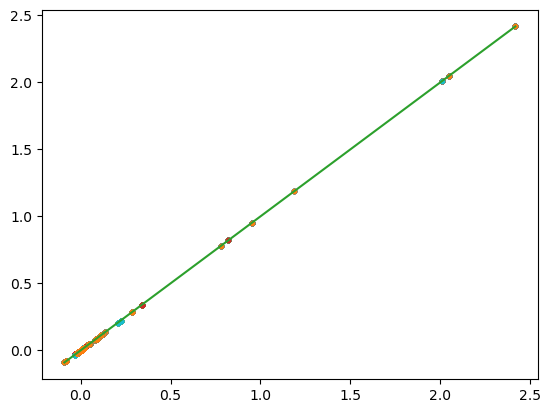

[1.28704833 0.7334737  2.32478995 0.40991948 1.82980789 2.02976027
 0.78097785]
[1.28704833 0.7334737  2.32478995 0.40991948 1.82980789 2.02976027
 0.78097785]
[-0.94077967  0.13882333  0.07051448  0.5024749  -0.34026762 -0.83978403
  0.84387931]
[-0.94077967  0.13882333  0.07051448  0.5024749  -0.34026762 -0.83978403
  0.84387931]
[-0.44868234 -0.31425023  0.36497782  2.18363516  1.49635404  0.81701704
  0.72925397]
[-0.44868234 -0.31425023  0.36497782  2.18363516  1.49635404  0.81701704
  0.72925397]
[ 3.42921182  1.90706734  0.23453084 -0.99120238  0.50744638  0.77895706
  0.36921462]
[ 3.42921182  1.90706734  0.23453084 -0.99120238  0.50744638  0.77895706
  0.36921462]
[-0.11574741 -0.37808312  0.08491883  1.52344968  0.51941538 -0.15169384]
[-0.11574741 -0.37808312  0.08491883  1.52344968  0.51941538 -0.15169384]
[ 0.57044222 -0.31650729 -0.64275564 -0.6540447  -1.20172888  0.6959273 ]
[ 0.57044222 -0.31650729 -0.64275564 -0.6540447  -1.20172888  0.6959273 ]
[-0.56255964  0.500110

In [9]:


plt.plot(sqrtcovg2,sqrtcovg2est,linestyle='none',marker='.')
plt.plot([np.min(sqrtcovg2), np.max(sqrtcovg2)],[np.min(sqrtcovg2), np.max(sqrtcovg2)])
plt.show()

for ip in np.arange(0,4):
    print(wdsqrt[ip,:])
    print(wdsqrtest[ip,:])

for ip in np.arange(0,2):
    print(wtsqrt[ip,:])
    print(wtsqrtest[ip,:])

print(wosqrt)
print(wosqrtest)

